In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver 
from selenium.webdriver.common.keys import Keys
import time
from scipy import stats

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/nguye639/DSCI_Project/master/cleanData.csv")
df = df.drop(columns=['Unnamed: 0'])

In [3]:
df_sub = df.loc[:,['Name'] + [f'Bill_{i}' for i in range(1, 311)]]

In [4]:
df_piv = df_sub.pivot_table( columns='Name',
                     values=[f'Bill_{i}' for i in range(1, 311)], aggfunc='first').reset_index()
df_piv.head()

Name,index,a_dutch_ruppersberger,abigail_spanberger,adam_kinzinger,adam_schiff,adam_smith,adrian_smith,adriano_espaillat,al_green,al_lawson,...,vicky_hartzler,victoria_spartz,virginia_foxx,warren_davidson,william_keating,william_timmons,young_kim,yvette_clarke,yvette_herrell,zoe_lofgren
0,Bill_1,Not_Voting,Not_Voting,Yea,Not_Voting,Yea,Yea,Yea,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea
1,Bill_10,Yea,Yea,Nay,Yea,Yea,Nay,Yea,Yea,Yea,...,Nay,Nay,Nay,Nay,Yea,Nay,Nay,Yea,Nay,Yea
2,Bill_100,Yea,Yea,Nay,Yea,Yea,Nay,Yea,Yea,Yea,...,Nay,Nay,Nay,Nay,Yea,Nay,Nay,Yea,Nay,Yea
3,Bill_101,Yea,Yea,Nay,Yea,Yea,Nay,Yea,Yea,Yea,...,Nay,Nay,Nay,Nay,Yea,Nay,Nay,Yea,Nay,Yea
4,Bill_102,Yea,Yea,Yea,Yea,Yea,Yea,Not_Voting,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea


In [5]:
df_sub.head()

,Name,Bill_1,Bill_2,Bill_3,Bill_4,Bill_5,Bill_6,Bill_7,Bill_8,Bill_9,...,Bill_301,Bill_302,Bill_303,Bill_304,Bill_305,Bill_306,Bill_307,Bill_308,Bill_309,Bill_310
0,a_dutch_ruppersberger,Not_Voting,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Nay,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
1,abigail_spanberger,Not_Voting,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Nay,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
2,adam_kinzinger,Yea,Nay,Nay,Nay,Yea,Nay,Yea,Nay,Nay,...,Yea,Not_Voting,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea
3,adam_schiff,Not_Voting,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Nay,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
4,adam_smith,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Nay,...,Yea,Yea,Yea,Not_Voting,Yea,Yea,Nay,Yea,Yea,Yea


In [6]:
df_sub.melt(id_vars=[f'Bill_{i}' for i in range(1, 311)],
           var_name='Name')

,Bill_1,Bill_2,Bill_3,Bill_4,Bill_5,Bill_6,Bill_7,Bill_8,Bill_9,Bill_10,...,Bill_303,Bill_304,Bill_305,Bill_306,Bill_307,Bill_308,Bill_309,Bill_310,Name,value
0,Not_Voting,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Nay,Yea,...,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea,Name,a_dutch_ruppersberger
1,Not_Voting,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Nay,Yea,...,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea,Name,abigail_spanberger
2,Yea,Nay,Nay,Nay,Yea,Nay,Yea,Nay,Nay,Nay,...,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Name,adam_kinzinger
3,Not_Voting,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Nay,Yea,...,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea,Name,adam_schiff
4,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Nay,Yea,...,Yea,Not_Voting,Yea,Yea,Nay,Yea,Yea,Yea,Name,adam_smith
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,Yea,Nay,Nay,Nay,Yea,Nay,Yea,Yea,Yea,Nay,...,Nay,Nay,Yea,Nay,Yea,Nay,Nay,Yea,Name,william_timmons
434,Yea,Nay,Nay,Nay,Yea,Nay,Yea,Not_Voting,Nay,Nay,...,Nay,Nay,Yea,Yea,Yea,Nay,Yea,Yea,Name,young_kim
435,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Nay,Yea,...,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea,Name,yvette_clarke
436,Yea,Nay,Nay,Nay,Yea,Nay,Yea,Yea,Yea,Nay,...,Nay,Nay,Yea,Nay,Yea,Nay,Nay,Yea,Name,yvette_herrell


In [7]:
df.head()

,Name,State,Party,Bill_1,Bill_2,Bill_3,Bill_4,Bill_5,Bill_6,Bill_7,...,Bill_301,Bill_302,Bill_303,Bill_304,Bill_305,Bill_306,Bill_307,Bill_308,Bill_309,Bill_310
0,a_dutch_ruppersberger,Maryland,Democrat,Not_Voting,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
1,abigail_spanberger,Virginia,Democrat,Not_Voting,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
2,adam_kinzinger,Illinois,Republican,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Not_Voting,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea
3,adam_schiff,California,Democrat,Not_Voting,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
4,adam_smith,Washington,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Not_Voting,Yea,Yea,Nay,Yea,Yea,Yea


In [8]:
df

,Name,State,Party,Bill_1,Bill_2,Bill_3,Bill_4,Bill_5,Bill_6,Bill_7,...,Bill_301,Bill_302,Bill_303,Bill_304,Bill_305,Bill_306,Bill_307,Bill_308,Bill_309,Bill_310
0,a_dutch_ruppersberger,Maryland,Democrat,Not_Voting,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
1,abigail_spanberger,Virginia,Democrat,Not_Voting,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
2,adam_kinzinger,Illinois,Republican,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Not_Voting,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea
3,adam_schiff,California,Democrat,Not_Voting,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
4,adam_smith,Washington,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Not_Voting,Yea,Yea,Nay,Yea,Yea,Yea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,william_timmons,South_Carolina,Republican,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Yea,Nay,Nay,Yea,Nay,Yea,Nay,Nay,Yea
434,young_kim,California,Republican,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Yea,Nay,Nay,Yea,Yea,Yea,Nay,Yea,Yea
435,yvette_clarke,New_York,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
436,yvette_herrell,New_Mexico,Republican,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Yea,Nay,Nay,Yea,Nay,Yea,Nay,Nay,Yea


- Introduce bernoulli probability model where politicians become columns, bills become rows
- demonstrates a unique way of seeing who corresponds to which bill with their decision making

- probabilistic clusters: bernoulli mixture model, restricted boltzman machines (probabilistic neural network)



In [9]:
df.columns

Index(['Name', 'State', 'Party', 'Bill_1', 'Bill_2', 'Bill_3', 'Bill_4',
       'Bill_5', 'Bill_6', 'Bill_7',
       ...
       'Bill_301', 'Bill_302', 'Bill_303', 'Bill_304', 'Bill_305', 'Bill_306',
       'Bill_307', 'Bill_308', 'Bill_309', 'Bill_310'],
      dtype='object', length=313)

In [10]:
df

,Name,State,Party,Bill_1,Bill_2,Bill_3,Bill_4,Bill_5,Bill_6,Bill_7,...,Bill_301,Bill_302,Bill_303,Bill_304,Bill_305,Bill_306,Bill_307,Bill_308,Bill_309,Bill_310
0,a_dutch_ruppersberger,Maryland,Democrat,Not_Voting,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
1,abigail_spanberger,Virginia,Democrat,Not_Voting,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
2,adam_kinzinger,Illinois,Republican,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Not_Voting,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea
3,adam_schiff,California,Democrat,Not_Voting,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
4,adam_smith,Washington,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Not_Voting,Yea,Yea,Nay,Yea,Yea,Yea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,william_timmons,South_Carolina,Republican,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Yea,Nay,Nay,Yea,Nay,Yea,Nay,Nay,Yea
434,young_kim,California,Republican,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Yea,Nay,Nay,Yea,Yea,Yea,Nay,Yea,Yea
435,yvette_clarke,New_York,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
436,yvette_herrell,New_Mexico,Republican,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Yea,Nay,Nay,Yea,Nay,Yea,Nay,Nay,Yea


Identify a new column that shows whether or not politicians are voting for or against their party.
- (-1) — voting against their party
- (1) — voting with their party
- We can take a percentage to see who voted with their party and who voted against their party


In [11]:
df.value_counts()

Name                   State       Party       Bill_1      Bill_2      Bill_3      Bill_4      Bill_5      Bill_6      Bill_7      Bill_8      Bill_9      Bill_10     Bill_11     Bill_12     Bill_13     Bill_14     Bill_15     Bill_16     Bill_17     Bill_18     Bill_19     Bill_20     Bill_21     Bill_22     Bill_23     Bill_24     Bill_25     Bill_26     Bill_27     Bill_28     Bill_29     Bill_30     Bill_31     Bill_32     Bill_33     Bill_34     Bill_35     Bill_36     Bill_37     Bill_38     Bill_39     Bill_40     Bill_41     Bill_42     Bill_43     Bill_44     Bill_45     Bill_46     Bill_47     Bill_48     Bill_49     Bill_50     Bill_51     Bill_52     Bill_53     Bill_54     Bill_55     Bill_56     Bill_57     Bill_58     Bill_59     Bill_60     Bill_61     Bill_62     Bill_63     Bill_64     Bill_65     Bill_66     Bill_67     Bill_68     Bill_69     Bill_70     Bill_71     Bill_72     Bill_73     Bill_74     Bill_75     Bill_76     Bill_77     Bill_78     Bill_79     Bill_

In [12]:
#df.Group.value_counts()

In [13]:
df["Bill_309"].value_counts()

Yea           254
Nay           174
Not_Voting      9
Na              1
Name: Bill_309, dtype: int64

In [14]:
df.groupby("Bill_309")["Party"].value_counts()

Bill_309    Party     
Na          Republican      1
Nay         Republican    174
Not_Voting  Republican      5
            Democrat        4
Yea         Democrat      220
            Republican     34
Name: Party, dtype: int64

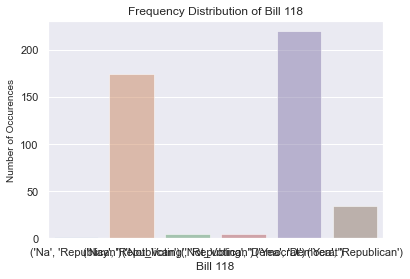

In [15]:
sample = df.groupby("Bill_309")["Party"].value_counts()
vote_count = sample
sns.set(style="darkgrid")
sns.barplot(sample.index, sample.values, alpha = 0.5)
plt.title('Frequency Distribution of Bill 118')
plt.ylabel('Number of Occurences', fontsize=10)
plt.xlabel('Bill 118', fontsize=12)
plt.show()

# maybe we should convert what the values are so its just easier all around?

In [16]:
df["Bill_108"].value_counts()

Yea           412
Not_Voting     17
Nay             8
Ye              1
Name: Bill_108, dtype: int64

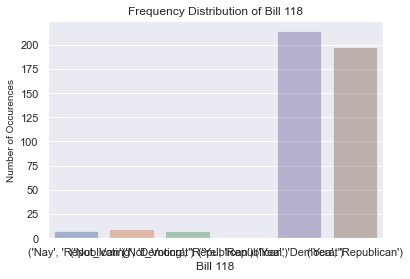

In [17]:
sample = df.groupby("Bill_108")["Party"].value_counts()
vote_count = sample
sns.set(style="darkgrid")
sns.barplot(sample.index, sample.values, alpha = 0.5)
plt.title('Frequency Distribution of Bill 118')
plt.ylabel('Number of Occurences', fontsize=10)
plt.xlabel('Bill 118', fontsize=12)
plt.show()

In [18]:
df.groupby("Bill_180")["Party"].value_counts()

Bill_180    Party     
Na          Republican      1
Nay         Republican    175
Not_Voting  Democrat        5
            Republican      5
Yea         Democrat      219
            Republican     33
Name: Party, dtype: int64

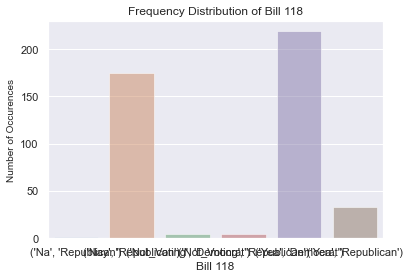

In [19]:
sample = df.groupby("Bill_180")["Party"].value_counts()
vote_count = sample
sns.set(style="darkgrid")
sns.barplot(sample.index, sample.values, alpha = 0.5)
plt.title('Frequency Distribution of Bill 118')
plt.ylabel('Number of Occurences', fontsize=10)
plt.xlabel('Bill 118', fontsize=12)
plt.show()

In [20]:
df["Bill_118"].value_counts()

Yea           321
Nay           100
Not_Voting     16
Na              1
Name: Bill_118, dtype: int64

In [21]:
df.groupby("Bill_118")["Party"].value_counts()

Bill_118    Party     
Na          Republican      1
Nay         Republican    100
Not_Voting  Democrat        9
            Republican      7
Yea         Democrat      215
            Republican    106
Name: Party, dtype: int64

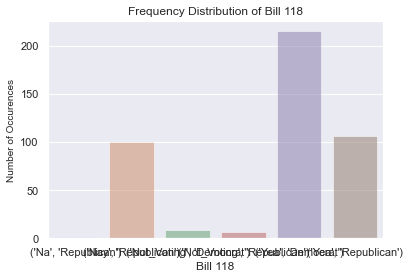

In [22]:
sample = df.groupby("Bill_118")["Party"].value_counts()
vote_count = sample
sns.set(style="darkgrid")
sns.barplot(sample.index, sample.values, alpha = 0.5)
plt.title('Frequency Distribution of Bill 118')
plt.ylabel('Number of Occurences', fontsize=10)
plt.xlabel('Bill 118', fontsize=12)
plt.show()

Rotate the label text —- xticks

https://www.delftstack.com/howto/seaborn/rotate-tick-labels-seaborn/

Consider the following for feature engineering:

df[(df['Party'] == 'Dem') & (df[Bill_2] == 1)]
df[(df['Party'] == 'Dem') & (df[Bill_2] == 2)]
max(val1, val2)
min_val = min(val1, val2)
df[(df['Party'] == 'Dem') & (df[Bill_2] == min_val)]

min value: # of people who voted agianst their party


Take most common value via value_counts
Do a count where each 

- graphing clusters
- similarity networks
- in which issues did democrats' and republicans' votes differ most?
- principal component analysis? compute distance using Rajski's distance?

ValueError: could not convert string to float: 'a_dutch_ruppersberger'

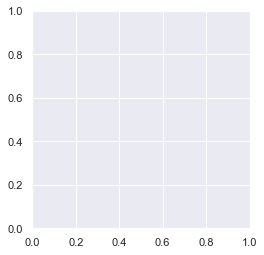

In [23]:
labels = ['Republican', 'Democrat']

colors = sns.color_palette('pastel')[0:5]

plt.pie(df, labels = labels, colors = colors, autopct = '%.0f%')
plt.show

In [ ]:
df["Voter Identification"] = 